In [ ]:
import numpy as np
#Run this cell
class Node:
  def __init__(self,elem,next = None):
    self.elem,self.next = elem,next

def createList(arr):
  head = Node(arr[0])
  tail = head
  for i in range(1,len(arr)):
    newNode = Node(arr[i])
    tail.next = newNode
    tail = newNode
  return head



def printLinkedList(head):
  temp = head
  while temp != None:
    if temp.next != None:
      print(temp.elem, end = '-->')
    else:
      print(temp.elem)
    temp = temp.next
  print()



def printLinkedListInReverse(head):
    if head == None:
        return
    else:
        printLinkedListInReverse(head.next)
        print(head.elem)


def nodeAt(head, idx):
    count = 0
    temp = head
    while temp != None:
        if count == idx:
            return temp
        count += 1
        temp = temp.next


def size_of_ll(head):
    total = 0
    temp = head
    while temp != None:
        total += 1
        temp = temp.next
    return total


def delete(head, position):
    if position == 0:
        head = head.next
    else:
        n1 = nodeAt(head, position-1)
        n2 = n1.next
        n3 = n2.next
        n1.next = n3
    return head


def leftRotation(head):
   n1 = head
   n2 = head.next
   n3 = head
   while n3.next != None:
      n3 = n3.next
   n3.next = n1
   n1.next = None
   return n2  #head = n2


def moveNodeToFront(head):
   n1 = head
   n2 = head
   while n2.next.next != None:
      n2 = n2.next

   n3 = n2.next
   n3.next = n1

   n2.next = None #break prev link
   head = n3 #new head
   return head



#driver code
list1 = createList(np.array([10,15,34,41,56,72]))
printLinkedList(list1)

#ok = delete(list1, 0)
#printLinkedList(ok)

#list1 = leftRotation(list1)
#printLinkedList(list1)
#list1 = leftRotation(list1)
#printLinkedList((list1))
#list1 = moveNodeToFront(list1)
print()
printLinkedList(list1)
printLinkedListInReverse(list1)

10-->15-->34-->41-->56-->72


10-->15-->34-->41-->56-->72

72
56
41
34
15
10


In [ ]:
def remove_Duplicates(head):
    temp1 = head
    while temp1 is not None:
        temp2 = temp1  # Start from the current node
        while temp2.next is not None:
            if temp1.elem == temp2.next.elem:
                temp2.next = temp2.next.next  # Remove the duplicate node
            else:
                temp2 = temp2.next  # Move to the next node
        temp1 = temp1.next  # Move to the next unique node
    return head


# Driver code for demonstration
# Test case: 10 → 20 → 30 → 40 → 50 → None
list1 = createList(np.array([101, 103, 101, 102, 103, 104, 105, 105]))
newarr = remove_Duplicates(list1)
printLinkedList(newarr)

101-->103-->102-->104-->105



In [ ]:
list1 = createList(np.array([10,15,34,41,56,72]))
print('Original Conga Line: ', end = ' ')
printLinkedList(list1)

delete(list1, 2)
printLinkedList(list1)

Original Conga Line:  10-->15-->34-->41-->56-->72

10-->15-->41-->56-->72



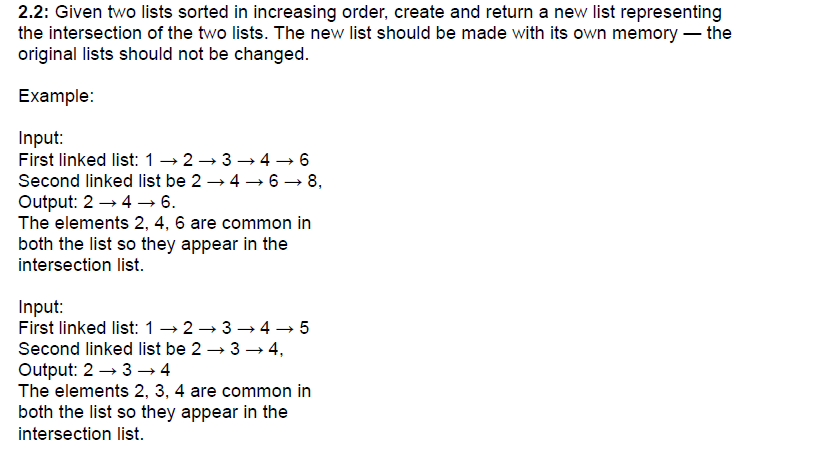

In [ ]:
def intersection_of_lists(head1, head2):
    dummy = Node(0)  # Dummy node to ease the creation of the new list
    tail = dummy

    # Traverse both lists
    while head1 is not None and head2 is not None:
        if head1.elem < head2.elem:
            head1 = head1.next
        elif head1.elem > head2.elem:
            head2 = head2.next
        else:
            # Found a common element
            newNode = Node(head1.elem)
            tail.next = newNode
            tail = newNode
            head1 = head1.next
            head2 = head2.next

    # Return the intersection list starting from the next of dummy
    return dummy.next


# Example driver code
list1 = createList(np.array([1, 2, 3, 4, 6]))
list2 = createList(np.array([2, 4, 6, 8]))

print("First linked list:")
printLinkedList(list1)

print("Second linked list:")
printLinkedList(list2)

# Compute the intersection
result = intersection_of_lists(list1, list2)

print("Intersection of the two linked lists:")
printLinkedList(result)


First linked list:
1-->2-->3-->4-->6

Second linked list:
2-->4-->6-->8

Intersection of the two linked lists:
2-->4-->6



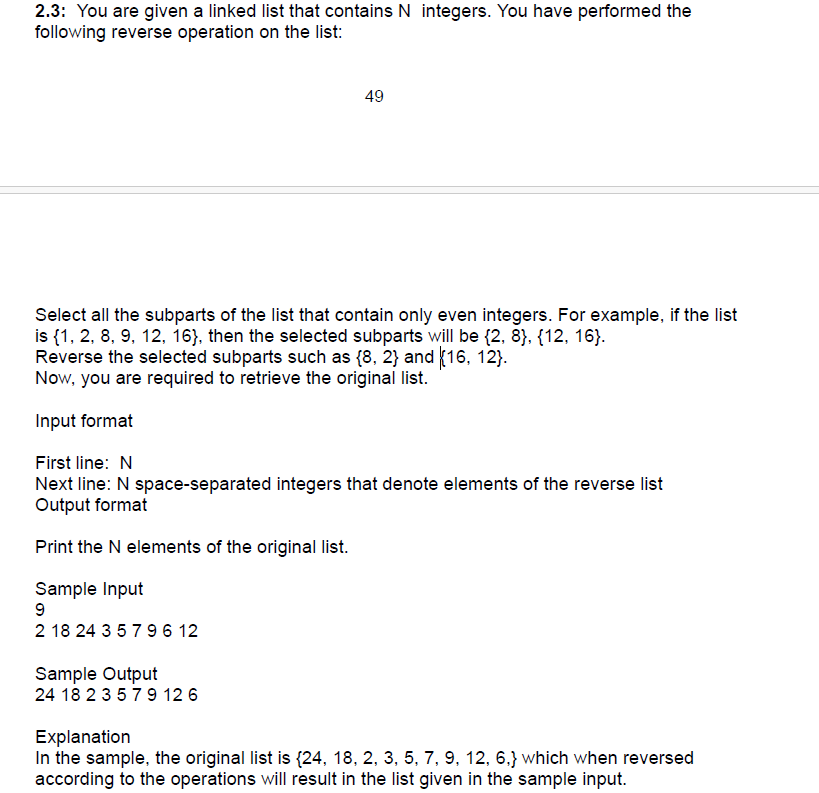

In [ ]:
def reverse_even_sublists(head):
    dummy = Node(0)  # Dummy node to simplify edge cases
    dummy.next = head
    prev = dummy
    curr = head

    while curr:
        # Find the start of a sequence of even numbers
        if curr.elem % 2 == 0:
            even_start = curr
            # Traverse the sequence of even numbers
            while curr and curr.elem % 2 == 0:
                curr = curr.next

            # Reverse the sublist of even numbers
            even_end = curr
            prev.next = reverse_sublist(even_start, even_end)
            prev = even_start
        else:
            prev = curr
            curr = curr.next

    return dummy.next


def reverse_sublist(start, end):
    prev = None
    curr = start

    while curr != end:
        next_node = curr.next
        curr.next = prev
        prev = curr
        curr = next_node

    return prev


# Driver code
n = 8
data = [18, 24, 3, 5, 7, 9, 6, 12]

# Create the linked list
reversed_list = createList(data)

print("Reversed List:")
printLinkedList(reversed_list)

# Reverse even sublists to retrieve the original list
original_list = reverse_even_sublists(reversed_list)

print("Original List:")
printLinkedList(original_list)


Reversed List:
18-->24-->3-->5-->7-->9-->6-->12

Original List:
24-->18



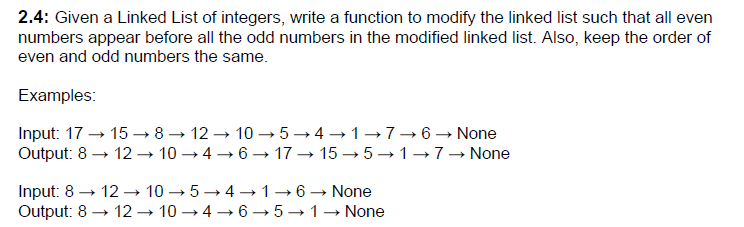

In [ ]:
def segregate_even_odd(head):
    # Create dummy nodes for even and odd lists
    even_dummy = Node(0)
    odd_dummy = Node(0)

    even_tail = even_dummy
    odd_tail = odd_dummy

    current = head

    while current:
        if current.elem % 2 == 0:  # Even node
            even_tail.next = current
            even_tail = even_tail.next
        else:  # Odd node
            odd_tail.next = current
            odd_tail = odd_tail.next
        current = current.next

    # Connect the even list with the odd list
    even_tail.next = odd_dummy.next
    odd_tail.next = None  # End the list

    return even_dummy.next


# Driver code
list1 = createList([17, 15, 8, 12, 10, 5, 4, 1, 7, 6])

print("Original List:")
printLinkedList(list1)

# Modify the list to segregate even and odd
modified_list = segregate_even_odd(list1)

print("Modified List (Even before Odd):")
printLinkedList(modified_list)


Original List:
17-->15-->8-->12-->10-->5-->4-->1-->7-->6

Modified List (Even before Odd):
8-->12-->10-->4-->6-->17-->15-->5-->1-->7



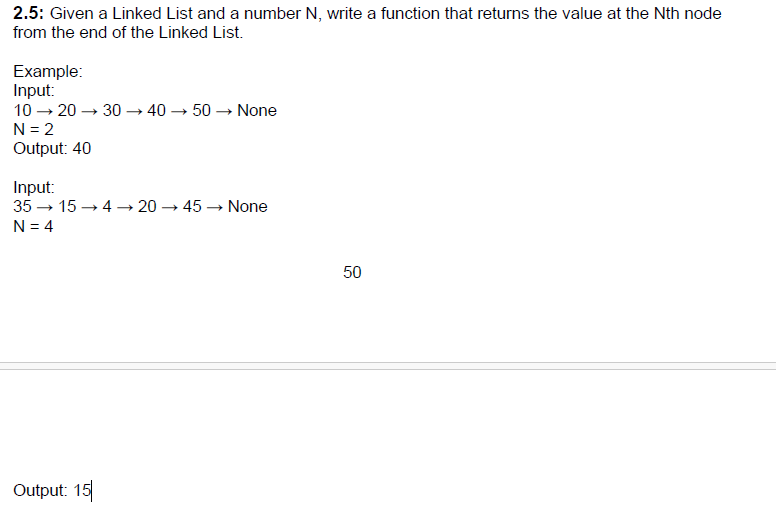

In [ ]:
def nth_from_end(head, N):
    # Two-pointer approach
    first = head
    second = head

    # Move the first pointer N steps ahead
    for _ in range(N):
        if first is None:  # If N is larger than the size of the list
            return None
        first = first.next

    # Move both pointers one step at a time until the first pointer reaches the end
    while first:
        first = first.next
        second = second.next

    # The second pointer now points to the Nth node from the end
    return second.elem


# Driver code
list1 = createList([10, 20, 30, 40, 50])
N = 2

print("Original List:")
printLinkedList(list1)

# Find the Nth node from the end
result = nth_from_end(list1, N)
print(f"The {N}th node from the end is: {result}")

# Another example
list2 = createList([35, 15, 4, 20, 45])
N = 4

print("\nOriginal List:")
printLinkedList(list2)

# Find the Nth node from the end
result = nth_from_end(list2, N)
print(f"The {N}th node from the end is: {result}")


Original List:
10-->20-->30-->40-->50

The 2th node from the end is: 40

Original List:
35-->15-->4-->20-->45

The 4th node from the end is: 15


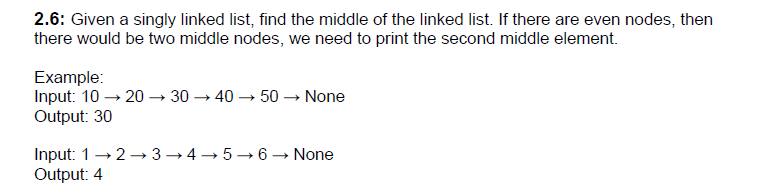

In [ ]:
def find_middle(head):
    slow = head
    fast = head

    # Traverse the list with two pointers
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

    # When fast reaches the end, slow will point to the middle
    return slow.elem


# Driver code
list1 = createList([10, 20, 30, 40, 50])
print("Original List:")
printLinkedList(list1)

# Find the middle of the list
middle = find_middle(list1)
print(f"The middle of the list is: {middle}")

# Another example
list2 = createList([1, 2, 3, 4, 5, 6])
print("\nOriginal List:")
printLinkedList(list2)

# Find the middle of the list
middle = find_middle(list2)
print(f"The middle of the list is: {middle}")


Original List:
10-->20-->30-->40-->50

The middle of the list is: 30

Original List:
1-->2-->3-->4-->5-->6

The middle of the list is: 4


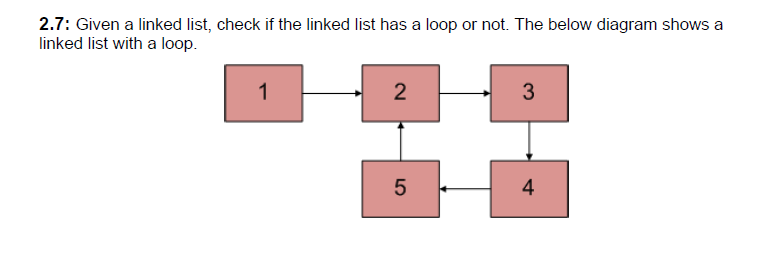

In [ ]:
# Checking for a loop in the linked list
def hasLoop(head):
    slow = head
    fast = head
    while fast is not None and fast.next is not None:
        slow = slow.next  # Move slow by 1 step
        fast = fast.next.next  # Move fast by 2 steps
        if slow == fast:
            return True  # Loop detected
    return False  # No loop detected

# Create a linked list with a loop for demonstration
list1 = createList(np.array([1, 2, 3, 4, 5]))
printLinkedList(list1)  # Will print normally since no loop yet

# Creating a loop manually: Point the 'next' of the last node to the second node
nodeAt(list1, 4).next = nodeAt(list1, 1)  # 5th node points to 2nd node, forming a loop

# Test the hasLoop function
print("Does the linked list have a loop?", hasLoop(list1))  # Should return True


1-->2-->3-->4-->5

Does the linked list have a loop? True


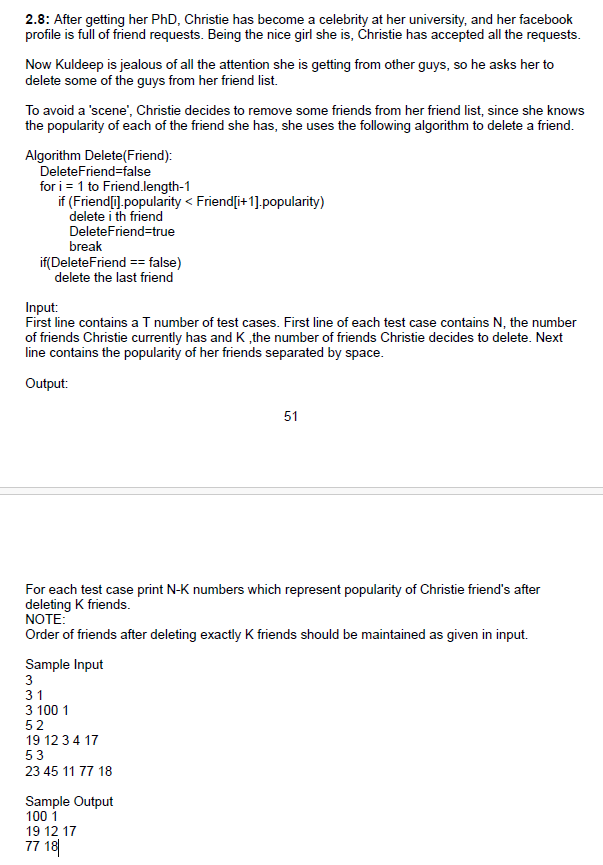

In [ ]:
def deleteFriends(head, k):
    for _ in range(k):
        delete_friend = False
        temp = head
        prev = None

        # Traverse the list to find a friend to delete
        while temp is not None and temp.next is not None:
            if temp.elem < temp.next.elem:
                if prev is None:
                    # Deleting the head of the list
                    head = temp.next
                else:
                    # Delete the current node
                    prev.next = temp.next
                delete_friend = True
                break
            prev = temp
            temp = temp.next

        # If no friend was deleted, remove the last node
        if not delete_friend:
            if prev is None:  # Single element left, make head None
                head = None
            else:
                prev.next = None

    return head


# Helper function to convert a linked list to an array for easy printing
def linkedListToArray(head):
    result = []
    temp = head
    while temp is not None:
        result.append(temp.elem)
        temp = temp.next
    return result


# Driver code for demonstration
# Test case: [3, 100, 1], K = 1
list1 = createList(np.array([3, 100, 1]))
print("Original list:", linkedListToArray(list1))

# Delete K = 1 friends
list1 = deleteFriends(list1, 1)
print("After deleting 1 friend:", linkedListToArray(list1))

# Test case: [19, 12, 3, 4, 17], K = 2
list2 = createList(np.array([19, 12, 3, 4, 17]))
print("Original list:", linkedListToArray(list2))

# Delete K = 2 friends
list2 = deleteFriends(list2, 2)
print("After deleting 2 friends:", linkedListToArray(list2))

# Test case: [23, 45, 11, 77, 18], K = 3
list3 = createList(np.array([23, 45, 11, 77, 18]))
print("Original list:", linkedListToArray(list3))

# Delete K = 3 friends
list3 = deleteFriends(list3, 3)
print("After deleting 3 friends:", linkedListToArray(list3))


Original list: [3, 100, 1]
After deleting 1 friend: [100, 1]
Original list: [19, 12, 3, 4, 17]
After deleting 2 friends: [19, 12, 17]
Original list: [23, 45, 11, 77, 18]
After deleting 3 friends: [77, 18]


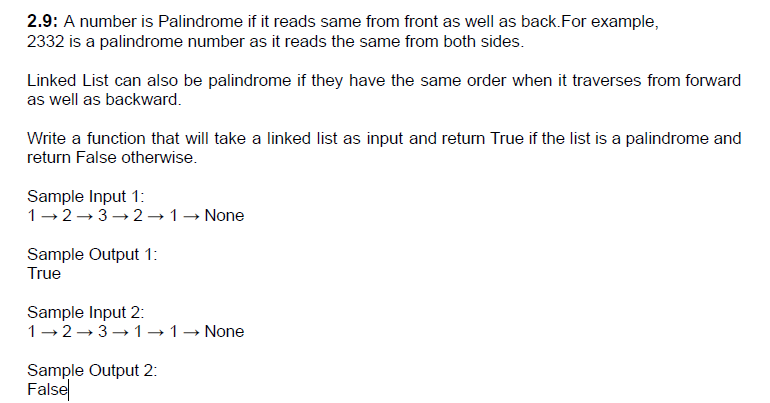

In [ ]:
def isPalindrome(head):
    # Step 1: Traverse the linked list and store its elements in an array
    elements = []
    temp = head
    while temp is not None:
        elements.append(temp.elem)
        temp = temp.next

    # Step 2: Check if the array is the same as its reverse
    return elements == elements[::-1]

# Driver code for demonstration
# Test case: 1 → 2 → 3 → 2 → 1 → None
list1 = createList(np.array([1, 2, 3, 2, 1]))
print("Is the linked list a palindrome?", isPalindrome(list1))  # Should return True

# Test case: 1 → 2 → 3 → 1 → 1 → None
list2 = createList(np.array([1, 2, 3, 1, 1]))
print("Is the linked list a palindrome?", isPalindrome(list2))  # Should return False


Is the linked list a palindrome? True
Is the linked list a palindrome? False


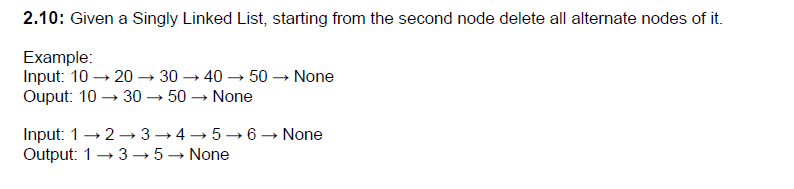

In [ ]:
def deleteAlternateNodes(head):
    if head is None or head.next is None:
        return head  # If the list has 0 or 1 node, nothing to delete

    temp = head
    while temp is not None and temp.next is not None:
        temp.next = temp.next.next  # Skip the next node
        temp = temp.next  # Move to the next node in the modified list

    return head

# Driver code for demonstration
# Test case: 10 → 20 → 30 → 40 → 50 → None
list1 = createList(np.array([10, 20, 30, 40, 50]))
print("Original list:")
printLinkedList(list1)

# Deleting alternate nodes
list1 = deleteAlternateNodes(list1)
print("After deleting alternate nodes:")
printLinkedList(list1)

# Test case: 1 → 2 → 3 → 4 → 5 → 6 → None
list2 = createList(np.array([1, 2, 3, 4, 5, 6]))
print("Original list:")
printLinkedList(list2)

# Deleting alternate nodes
list2 = deleteAlternateNodes(list2)
print("After deleting alternate nodes:")
printLinkedList(list2)


Original list:
10-->20-->30-->40-->50

After deleting alternate nodes:
10-->30-->50

Original list:
1-->2-->3-->4-->5-->6

After deleting alternate nodes:
1-->3-->5



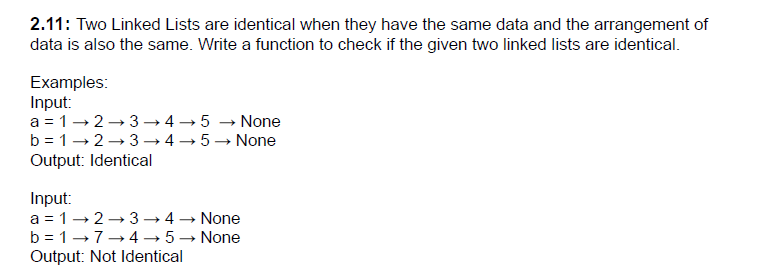

In [ ]:
def areIdentical(head1, head2):
    temp1 = head1
    temp2 = head2

    # Traverse both lists
    while temp1 is not None and temp2 is not None:
        if temp1.elem != temp2.elem:
            return "Not Identical"
        temp1 = temp1.next
        temp2 = temp2.next

    # If both lists have reached the end, they are identical; otherwise, not
    if temp1 is None and temp2 is None:
        return "Identical"
    else:
        return "Not Identical"

# Driver code for demonstration
# Test case 1: Identical lists
list1 = createList(np.array([1, 2, 3, 4, 5]))
list2 = createList(np.array([1, 2, 3, 4, 5]))
print("Are the linked lists identical?", areIdentical(list1, list2))  # Should return "Identical"

# Test case 2: Non-identical lists
list3 = createList(np.array([1, 2, 3, 4]))
list4 = createList(np.array([1, 7, 4, 5]))
print("Are the linked lists identical?", areIdentical(list3, list4))  # Should return "Not Identical"

# Test case 3: Lists of different lengths
list5 = createList(np.array([1, 2, 3]))
list6 = createList(np.array([1, 2, 3, 4]))
print("Are the linked lists identical?", areIdentical(list5, list6))  # Should return "Not Identical"


Are the linked lists identical? Identical
Are the linked lists identical? Not Identical
Are the linked lists identical? Not Identical


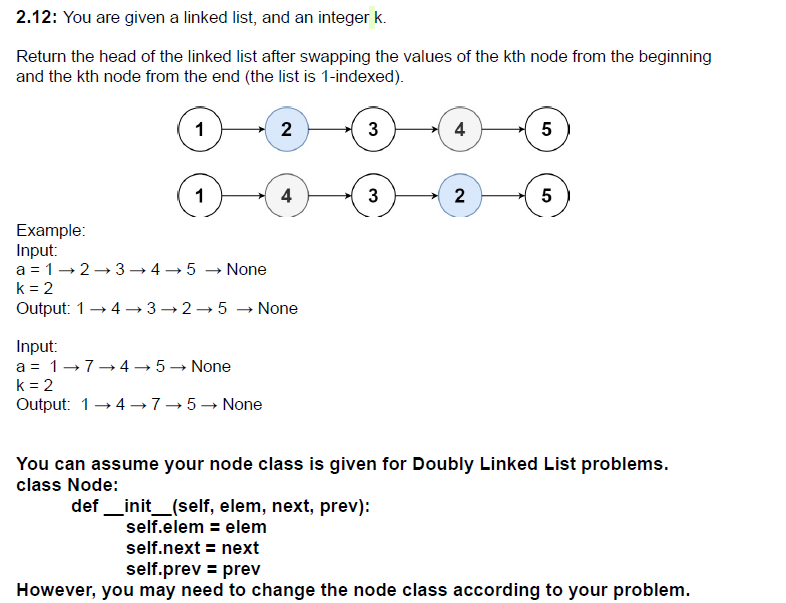

In [ ]:
def swapKthNodes(head, k):
    # Step 1: Find the length of the linked list
    length = size_of_ll(head)

    # Check if k is valid
    if k > length:
        print("Invalid k: greater than the length of the linked list")
        return head

    # Step 2: Locate the k-th node from the beginning and the end
    first_k_node = nodeAt(head, k - 1)  # 0-indexed, so k-1
    last_k_node = nodeAt(head, length - k)

    # Step 3: Swap the values of the two nodes
    if first_k_node and last_k_node:
        first_k_node.elem, last_k_node.elem = last_k_node.elem, first_k_node.elem

    return head

# Driver code for demonstration
# Test case 1: Swap 2nd node from the start and 2nd node from the end
list1 = createList(np.array([1, 2, 3, 4, 5]))
print("Original list:")
printLinkedList(list1)

k = 2
list1 = swapKthNodes(list1, k)
print(f"List after swapping {k}-th node from beginning and end:")
printLinkedList(list1)

# Test case 2: Swap 2nd node from the start and 2nd node from the end in a different list
list2 = createList(np.array([1, 7, 4, 5]))
print("Original list:")
printLinkedList(list2)

k = 2
list2 = swapKthNodes(list2, k)
print(f"List after swapping {k}-th node from beginning and end:")
printLinkedList(list2)


Original list:
1-->2-->3-->4-->5

List after swapping 2-th node from beginning and end:
1-->4-->3-->2-->5

Original list:
1-->7-->4-->5

List after swapping 2-th node from beginning and end:
1-->4-->7-->5

